In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy


import seaborn as sns
from sklearn.metrics import confusion_matrix

from IPython.display import display, Math, Latex

import nn

# Part 1: One Layer NN with One Output
## Problem 2

### Create Dataset
The data is meant to be a clustering problem in 3 dimensions. Anything close to the origin has a value of 0 and anything further has a value of 1.

In [2]:
data = pd.read_csv("A2_Data_EliWeissler.csv")
data

,X,Y,Z,LABEL
0,-0.5,0.0,-0.5,0
1,0.5,-0.5,0.0,0
2,0.0,0.0,1.0,0
3,0.5,0.5,0.5,0
4,2.0,1.0,2.0,1
5,3.0,1.0,1.0,1
6,2.0,3.0,1.0,1


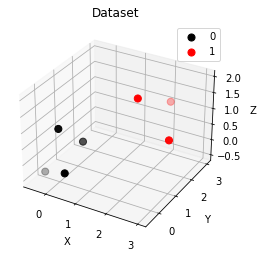

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting
colors = ["k", "r"]
for i in [0, 1]:
    data_subset = data[data["LABEL"] == i]
    ax.scatter(data_subset["X"], data_subset["Y"], data_subset["Z"],
               s=50, c=colors[i], label=data_subset["LABEL"].iloc[0])
ax.set_title('Dataset')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

### Create X and Y

In [4]:
X, Y = nn.normalize_data(data)
Math("X = " + sy.latex(sy.Matrix(np.round(X, 2))) +\
     "\quad Y = " + sy.latex(sy.Matrix(Y)))

<IPython.core.display.Math object>

### Do Feed Forward to H1

In [5]:
# Define weights and biases
W1 = np.ones((3, 4))
W2 = 2*np.ones((4, 1))
B = np.zeros((1, 4))
C = 0

# First hidden layer
Z1 = X@W1 + B
H1 = nn.sigmoid(Z1)

# Show H1
np.round(H1, 2)

array([[0.54, 0.54, 0.54, 0.54],
       [0.62, 0.62, 0.62, 0.62],
       [0.71, 0.71, 0.71, 0.71],
       [0.73, 0.73, 0.73, 0.73],
       [0.89, 0.89, 0.89, 0.89],
       [0.88, 0.88, 0.88, 0.88],
       [0.91, 0.91, 0.91, 0.91]])

### Calculate a Loss Function

In [11]:
# Output layer
Z2 = H1@W2 + C
yhat = nn.sigmoid(Z2)
loss = nn.loss_MSE(Y, yhat)
loss

array([[4.86508842e-01],
       [4.93010336e-01],
       [4.96549485e-01],
       [4.96995824e-01],
       [3.01441059e-07],
       [3.60751217e-07],
       [2.36959392e-07]])

## Problem 3

### Print out all the Matrices for Checking:

In [12]:
display(Math("X = " + sy.latex(sy.Matrix(np.round(X, 2)))))
display(Math("Y = " + sy.latex(sy.Matrix(Y))))
display(Math("W^{(1)} = " + sy.latex(sy.Matrix(W1))))
display(Math("B = " + sy.latex(sy.Matrix(B))))
display(Math("Z^{(1)} = " + sy.latex(sy.Matrix(np.round(Z1,2)))))
display(Math("H = " + sy.latex(sy.Matrix(np.round(H1,2)))))
display(Math("W^{(2)} = " + sy.latex(sy.Matrix(W2))))
display(Math("Z^{(2)} = " + sy.latex(sy.Matrix(np.round(Z2,2)))))
display(Math("C = " + str(np.round(C, 2))))
display(Math("\hat{y} = " + sy.latex(sy.Matrix(np.round(yhat,3)))))
display(Math("\hat{y}-Y = " + sy.latex(sy.Matrix(np.round(yhat-Y,5)))))
display(Math("L_{contributions} = " + sy.latex(sy.Matrix(loss))))
display(Math("L_{MSE} = " + str(np.round(np.mean(loss), 4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Problem 5/6

### Try training the network

In [8]:
# Initialize network and load data
data = pd.read_csv("A2_Data_EliWeissler.csv")
X, Y = nn.normalize_data(data)

input_size = 3
hidden_layers = [4]
output_size = 1
activation_fns = [nn.sigmoid, nn.sigmoid]
loss_fn = nn.loss_MSE
random_initialize =  True
network = nn.NeuralNetwork(input_size, output_size, hidden_layers,
                        activation_fns, loss_fn, random_initialize=random_initialize)

In [9]:
# Train network
epochs = 5000
lr = 1
batch_size = 3
loss = network.train(X, Y, X, Y, epochs=epochs, lr=lr, batch_size=batch_size)

Epoch 0 (out of 5000) -- Loss: 0.2271
Epoch 1000 (out of 5000) -- Loss: 0.0974
Epoch 2000 (out of 5000) -- Loss: 0.0303
Epoch 3000 (out of 5000) -- Loss: 0.0101
Epoch 4000 (out of 5000) -- Loss: 0.0054


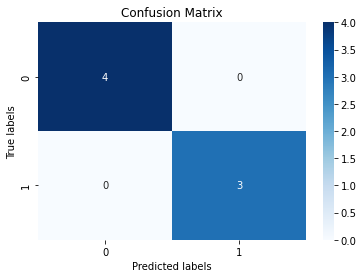

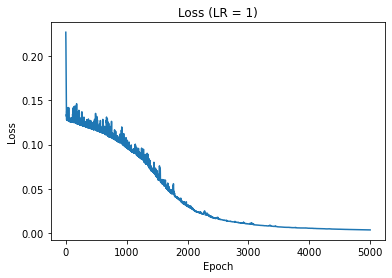

In [10]:
# Predict and plot
pred = network.feed_forward(X)

nn.plot_confusion_matrix(Y, pred)
nn.plot_loss(loss, lr)